In [66]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Все оставшееся/Axenix/Объединенные_данные_производства_и_плана.xlsx'
data = pd.read_excel(path, sheet_name='Sheet2')

In [ ]:
data.head()

,Номер заказа,Номер трубы,Категория,Время принятия на Электросварочный стан_plan,Время принятия на Электросварочный стан_fact,Время принятия в Буфер_plan,Время принятия в Буфер_fact,Длительность перехода из Электросварочный стан в Буфер_plan,Длительность перехода из Электросравочный стан в Буфер_fact,Время принятия на Кромкообрабатывающие станки_plan,...,Длительность перехода из Термообработка в Буфер.2_plan,Длительность перехода из Термообработка в Буфер.2_fact,Время принятия на Испытания_plan,Время принятия на Испытания_fact,Длительность перехода из Буфер.2 на Испытания_plan,Длительность перехода из Буфер.2 на Испытания_fact,Время принятия на Склад готовой продукции_plan,Время принятия на Склад готовой продукции_fact,Длительность перехода из Испытания на Склад готовой продукции_plan,Длительность перехода из Испытания на Склад готовой продукции_fact
0,135,15012396,Стальные трубы,2024-03-01 09:00:10,2024-03-01 09:00:00,2024-03-01 17:50:00,2024-03-01 17:50:00,08:49:50,08:50:00,2024-03-01 17:56:20,...,01:59:40,02:00:00,2024-03-01 22:41:10,2024-03-01 22:41:00,00:07:00,00:07:00,2024-03-02 00:52:40,2024-03-02 00:52:00,02:11:30,02:11:00
1,135,15012403,Стальные трубы,2024-03-01 09:01:20,2024-03-01 09:01:00,2024-03-01 17:51:20,2024-03-01 17:51:00,08:50:00,08:50:00,2024-03-01 17:57:00,...,01:59:40,02:00:00,2024-03-01 22:42:00,2024-03-01 22:42:00,00:06:30,00:07:00,2024-03-02 00:53:30,2024-03-02 00:53:00,02:11:30,02:11:00
2,135,15012410,Стальные трубы,2024-03-01 09:02:30,2024-03-01 09:02:00,2024-03-01 17:52:30,2024-03-01 17:52:00,08:50:00,08:50:00,2024-03-01 17:57:40,...,01:59:40,01:59:00,2024-03-01 22:42:50,2024-03-01 22:42:00,00:06:00,00:06:00,2024-03-02 00:54:20,2024-03-02 00:54:00,02:11:30,02:12:00
3,135,15012417,Стальные трубы,2024-03-01 09:03:40,2024-03-01 09:03:00,2024-03-01 17:53:40,2024-03-01 17:53:00,08:50:00,08:50:00,2024-03-01 17:58:20,...,01:59:40,02:00:00,2024-03-01 22:43:40,2024-03-01 22:43:00,00:05:30,00:05:00,2024-03-02 00:55:00,2024-03-02 00:55:00,02:11:20,02:12:00
4,135,15012424,Стальные трубы,2024-03-01 09:04:50,2024-03-01 09:04:00,2024-03-01 17:54:50,2024-03-01 17:54:00,08:50:00,08:50:00,2024-03-01 17:59:00,...,1900-01-14 01:59:50,1900-01-14 02:00:00,2024-03-01 22:44:30,2024-03-01 22:44:00,1899-12-16 00:04:50,1899-12-16 00:05:00,2024-03-02 00:56:00,2024-03-02 00:56:00,02:11:30,02:12:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 33 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Номер заказа                                                         15506 non-null  int64         
 1   Номер трубы                                                          15506 non-null  int64         
 2   Категория                                                            15506 non-null  object        
 3   Время принятия на Электросварочный стан_plan                         15506 non-null  datetime64[ns]
 4   Время принятия на Электросварочный стан_fact                         15506 non-null  datetime64[ns]
 5   Время принятия в Буфер_plan                                          15506 non-null  datetime64[ns]
 6   Время принятия в Буфер_fact                   

1. Длительность перехода из Электросварочный стан в Буфер_plan = Время принятия в Буфер_plan - Время принятия на Электросварочный стан_plan

2. Длительность перехода из Электросравочный стан в Буфер_fact = Время принятия в Буфер_fact - Время принятия на Электросварочный стан_fact

3. Длительность перехода из Буфера на Кромкообрабатывающие станки_plan = Время принятия на Кромкообрабатывающие станки_plan -Время принятия в Буфер_plan

4. Длительность перехода из Буфера на Кромкообрабатывающие станки_fact = Время принятия на Кромкообрабатывающие станки_fact - Время принятия в Буфер_fact

5. Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan = Время принятия в Буфер.1_plan -  Время принятия на Кромкообрабатывающие станки_plan

6. Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact = Время принятия в Буфер.1_fact - Время принятия на Кромкообрабатывающие станки_fact

7. Длительность перехода из Буфер.1 на Термообработку_plan = Время принятия на Термообработку_plan - Время принятия в Буфер.1_plan

8. Длительность перехода из Буфер.1 на Термообработку_fact = Время принятия на Термообработку_fact - Время принятия в Буфер.1_fact

9. Длительность перехода из Термообработка в Буфер.2_plan = Время принятия в Буфер.2_plan - Время принятия на Термообработку_plan

10. Длительность перехода из Термообработка в Буфер.2_fact = Время принятия в Буфер.2_fact - Время принятия на Термообработку_fact

11. Длительность перехода из Буфер.2 на Испытания_plan = Время принятия на Испытания_plan - Время принятия в Буфер.2_plan

12. Длительность перехода из Буфер.2 на Испытания_fact = Время принятия на Испытания_fact - Время принятия в Буфер.2_fact

13. Длительность перехода из Испытания на Склад готовой продукции_plan =
Время принятия на Склад готовой продукции_plan - Время принятия на Испытания_plan

14. Длительность перехода из Испытания на Склад готовой продукции_fact = Время принятия на Склад готовой продукции_fact -  Время принятия на Испытания_fact

In [ ]:
# 1. Длительность перехода из Электросварочный стан в Буфер_plan = Время принятия в Буфер_plan - Время принятия на Электросварочный стан_plan
data['Время принятия в Буфер_plan'] = pd.to_datetime(data['Время принятия в Буфер_plan'])
data['Время принятия на Электросварочный стан_plan'] = pd.to_datetime(data['Время принятия на Электросварочный стан_plan'])
data['Длительность перехода из Электросварочный стан в Буфер_plan'] = data['Время принятия в Буфер_plan'] - data['Время принятия на Электросварочный стан_plan']

# 2. Длительность перехода из Электросравочный стан в Буфер_fact = Время принятия в Буфер_fact - Время принятия на Электросварочный стан_fact
data['Время принятия в Буфер_fact'] = pd.to_datetime(data['Время принятия в Буфер_fact'])
data['Время принятия на Электросварочный стан_fact'] = pd.to_datetime(data['Время принятия на Электросварочный стан_fact'])
data['Длительность перехода из Электросравочный стан в Буфер_fact'] = data['Время принятия в Буфер_fact'] - data['Время принятия на Электросварочный стан_fact']

# 3. Длительность перехода из Буфера на Кромкообрабатывающие станки_plan = Время принятия на Кромкообрабатывающие станки_plan - Время принятия в Буфер_plan
data['Время принятия на Кромкообрабатывающие станки_plan'] = pd.to_datetime(data['Время принятия на Кромкообрабатывающие станки_plan'])
data['Время принятия в Буфер_plan'] = pd.to_datetime(data['Время принятия в Буфер_plan'])
data['Длительность перехода из Буфера на Кромкообрабатывающие станки_plan'] = data['Время принятия на Кромкообрабатывающие станки_plan'] - data['Время принятия в Буфер_plan']

# 4. Длительность перехода из Буфера на Кромкообрабатывающие станки_fact = Время принятия на Кромкообрабатывающие станки_fact - Время принятия в Буфер_fact
data['Время принятия на Кромкообрабатывающие станки_fact'] = pd.to_datetime(data['Время принятия на Кромкообрабатывающие станки_fact'])
data['Время принятия в Буфер_fact'] = pd.to_datetime(data['Время принятия в Буфер_fact'])
data['Длительность перехода из Буфера на Кромкообрабатывающие станки_fact'] = data['Время принятия на Кромкообрабатывающие станки_fact'] - data['Время принятия в Буфер_fact']

# 5. Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan = Время принятия в Буфер.1_plan -  Время принятия на Кромкообрабатывающие станки_plan
data['Время принятия в Буфер.1_plan'] = pd.to_datetime(data['Время принятия в Буфер.1_plan'])
data['Время принятия на Кромкообрабатывающие станки_plan'] = pd.to_datetime(data['Время принятия на Кромкообрабатывающие станки_plan'])
data['Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan'] = data['Время принятия в Буфер.1_plan'] - data['Время принятия на Кромкообрабатывающие станки_plan']

# 6. Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact = Время принятия в Буфер.1_fact - Время принятия на Кромкообрабатывающие станки_fact
data['Время принятия в Буфер.1_fact'] = pd.to_datetime(data['Время принятия в Буфер.1_fact'])
data['Время принятия на Кромкообрабатывающие станки_fact'] = pd.to_datetime(data['Время принятия на Кромкообрабатывающие станки_fact'])
data['Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact'] = data['Время принятия в Буфер.1_fact'] - data['Время принятия на Кромкообрабатывающие станки_fact']

# 7. Длительность перехода из Буфер.1 на Термообработку_plan = Время принятия на Термообработку_plan - Время принятия в Буфер.1_plan
data['Время принятия на Термообработку_plan'] = pd.to_datetime(data['Время принятия на Термообработку_plan'])
data['Время принятия в Буфер.1_plan'] = pd.to_datetime(data['Время принятия в Буфер.1_plan'])
data['Длительность перехода из Буфер.1 на Термообработку_plan'] = data['Время принятия на Термообработку_plan'] - data['Время принятия в Буфер.1_plan']

# 8. Длительность перехода из Буфер.1 на Термообработку_fact = Время принятия на Термообработку_fact - Время принятия в Буфер.1_fact
data['Время принятия на Термообработку_fact'] = pd.to_datetime(data['Время принятия на Термообработку_fact'])
data['Время принятия в Буфер.1_fact'] = pd.to_datetime(data['Время принятия в Буфер.1_fact'])
data['Длительность перехода из Буфер.1 на Термообработку_fact'] = data['Время принятия на Термообработку_fact'] - data['Время принятия в Буфер.1_fact']

# 9. Длительность перехода из Термообработка в Буфер.2_plan = Время принятия в Буфер.2_plan - Время принятия на Термообработку_plan
data['Время принятия в Буфер.2_plan'] = pd.to_datetime(data['Время принятия в Буфер.2_plan'])
data[' Время принятия на Термообработку_plan'] = pd.to_datetime(data['Время принятия на Термообработку_plan'])
data['Длительность перехода из Термообработка в Буфер.2_plan'] = data['Время принятия в Буфер.2_plan'] - data[' Время принятия на Термообработку_plan']

# 10. Длительность перехода из Термообработка в Буфер.2_fact = Время принятия в Буфер.2_fact - Время принятия на Термообработку_fact
data['Время принятия в Буфер.2_fact'] = pd.to_datetime(data['Время принятия в Буфер.2_fact'])
data['Время принятия на Термообработку_fact'] = pd.to_datetime(data['Время принятия на Термообработку_fact'])
data['Длительность перехода из Термообработка в Буфер.2_fact'] = data['Время принятия в Буфер.2_fact'] - data['Время принятия на Термообработку_fact']

# 11. Длительность перехода из Буфер.2 на Испытания_plan = Время принятия на Испытания_plan - Время принятия в Буфер.2_plan
data['Время принятия на Испытания_plan'] = pd.to_datetime(data['Время принятия на Испытания_plan'])
data['Время принятия в Буфер.2_plan'] = pd.to_datetime(data['Время принятия в Буфер.2_plan'])
data['Длительность перехода из Буфер.2 на Испытания_plan'] = data['Время принятия на Испытания_plan'] - data['Время принятия в Буфер.2_plan']

# 12. Длительность перехода из Буфер.2 на Испытания_fact = Время принятия на Испытания_fact - Время принятия в Буфер.2_fact
data['Время принятия на Испытания_fact'] = pd.to_datetime(data['Время принятия на Испытания_fact'])
data['Время принятия в Буфер.2_fact'] = pd.to_datetime(data['Время принятия в Буфер.2_fact'])
data['Длительность перехода из Буфер.2 на Испытания_fact'] = data['Время принятия на Испытания_fact'] - data['Время принятия в Буфер.2_fact']

# 13. Длительность перехода из Испытания на Склад готовой продукции_plan = Время принятия на Склад готовой продукции_plan - Время принятия на Испытания_plan
data['Время принятия на Склад готовой продукции_plan'] = pd.to_datetime(data['Время принятия на Склад готовой продукции_plan'])
data['Время принятия на Испытания_plan'] = pd.to_datetime(data['Время принятия на Испытания_plan'])
data['Длительность перехода из Испытания на Склад готовой продукции_plan'] = data['Время принятия на Склад готовой продукции_plan'] - data['Время принятия на Испытания_plan']

# 14. Длительность перехода из Испытания на Склад готовой продукции_fact = Время принятия на Склад готовой продукции_fact - Время принятия на Испытания_fact
data['Время принятия на Склад готовой продукции_fact'] = pd.to_datetime(data['Время принятия на Склад готовой продукции_fact'])
data['Время принятия на Испытания_fact'] = pd.to_datetime(data['Время принятия на Испытания_fact'])
data['Длительность перехода из Испытания на Склад готовой продукции_fact'] = data['Время принятия на Склад готовой продукции_fact'] - data['Время принятия на Испытания_fact']

In [ ]:
data.to_excel('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/ОДПП. Очищенные с подсчитанными данными.xlsx', index=False)
data.to_csv('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/ОДПП. Очищенные с подсчитанными данными.csv', index=False)

In [ ]:
data.head()

,Номер заказа,Номер трубы,Категория,Время принятия на Электросварочный стан_plan,Время принятия на Электросварочный стан_fact,Время принятия в Буфер_plan,Время принятия в Буфер_fact,Длительность перехода из Электросварочный стан в Буфер_plan,Длительность перехода из Электросравочный стан в Буфер_fact,Время принятия на Кромкообрабатывающие станки_plan,...,Длительность перехода из Термообработка в Буфер.2_fact,Время принятия на Испытания_plan,Время принятия на Испытания_fact,Длительность перехода из Буфер.2 на Испытания_plan,Длительность перехода из Буфер.2 на Испытания_fact,Время принятия на Склад готовой продукции_plan,Время принятия на Склад готовой продукции_fact,Длительность перехода из Испытания на Склад готовой продукции_plan,Длительность перехода из Испытания на Склад готовой продукции_fact,Время принятия на Термообработку_plan
0,135,15012396,Стальные трубы,2024-03-01 09:00:10,2024-03-01 09:00:00,2024-03-01 17:50:00,2024-03-01 17:50:00,0 days 08:49:50,0 days 08:50:00,2024-03-01 17:56:20,...,0 days 02:00:00,2024-03-01 22:41:10,2024-03-01 22:41:00,0 days 00:07:00,0 days 00:07:00,2024-03-02 00:52:40,2024-03-02 00:52:00,0 days 02:11:30,0 days 02:11:00,2024-03-01 20:34:30
1,135,15012403,Стальные трубы,2024-03-01 09:01:20,2024-03-01 09:01:00,2024-03-01 17:51:20,2024-03-01 17:51:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:57:00,...,0 days 02:00:00,2024-03-01 22:42:00,2024-03-01 22:42:00,0 days 00:06:30,0 days 00:07:00,2024-03-02 00:53:30,2024-03-02 00:53:00,0 days 02:11:30,0 days 02:11:00,2024-03-01 20:35:50
2,135,15012410,Стальные трубы,2024-03-01 09:02:30,2024-03-01 09:02:00,2024-03-01 17:52:30,2024-03-01 17:52:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:57:40,...,0 days 01:59:00,2024-03-01 22:42:50,2024-03-01 22:42:00,0 days 00:06:00,0 days 00:06:00,2024-03-02 00:54:20,2024-03-02 00:54:00,0 days 02:11:30,0 days 02:12:00,2024-03-01 20:37:10
3,135,15012417,Стальные трубы,2024-03-01 09:03:40,2024-03-01 09:03:00,2024-03-01 17:53:40,2024-03-01 17:53:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:58:20,...,0 days 02:00:00,2024-03-01 22:43:40,2024-03-01 22:43:00,0 days 00:05:30,0 days 00:05:00,2024-03-02 00:55:00,2024-03-02 00:55:00,0 days 02:11:20,0 days 02:12:00,2024-03-01 20:38:30
4,135,15012424,Стальные трубы,2024-03-01 09:04:50,2024-03-01 09:04:00,2024-03-01 17:54:50,2024-03-01 17:54:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:59:00,...,14 days 02:00:00,2024-03-01 22:44:30,2024-03-01 22:44:00,-14 days +00:04:50,-14 days +00:05:00,2024-03-02 00:56:00,2024-03-02 00:56:00,0 days 02:11:30,0 days 02:12:00,2024-03-01 20:39:50


In [ ]:
sum_data = data.groupby('Номер заказа')[['Длительность перехода из Электросварочный стан в Буфер_plan',
                              'Длительность перехода из Электросравочный стан в Буфер_fact',
                              'Длительность перехода из Буфера на Кромкообрабатывающие станки_plan',
                              'Длительность перехода из Буфера на Кромкообрабатывающие станки_fact',
                              'Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan',
                              'Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact',
                              'Длительность перехода из Буфер.1 на Термообработку_plan',
                              'Длительность перехода из Буфер.1 на Термообработку_fact',
                              'Длительность перехода из Термообработка в Буфер.2_plan',
                              'Длительность перехода из Термообработка в Буфер.2_fact',
                              'Длительность перехода из Буфер.2 на Испытания_plan',
                              'Длительность перехода из Буфер.2 на Испытания_fact',
                              'Длительность перехода из Испытания на Склад готовой продукции_plan',
                              'Длительность перехода из Испытания на Склад готовой продукции_fact']].agg(['sum'])

In [ ]:
sum_data.to_excel('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/Группировка по сумме времени фактических и планируемых этапов.xlsx')
sum_data.to_csv('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/Группировка по сумме времени фактических и планируемых этапов.csv')

In [ ]:
sum_data.head()

,Длительность перехода из Электросварочный стан в Буфер_plan,Длительность перехода из Электросравочный стан в Буфер_fact,Длительность перехода из Буфера на Кромкообрабатывающие станки_plan,Длительность перехода из Буфера на Кромкообрабатывающие станки_fact,Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan,Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact,Длительность перехода из Буфер.1 на Термообработку_plan,Длительность перехода из Буфер.1 на Термообработку_fact,Длительность перехода из Термообработка в Буфер.2_plan,Длительность перехода из Термообработка в Буфер.2_fact,Длительность перехода из Буфер.2 на Испытания_plan,Длительность перехода из Буфер.2 на Испытания_fact,Длительность перехода из Испытания на Склад готовой продукции_plan,Длительность перехода из Испытания на Склад готовой продукции_fact
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Номер заказа,,,,,,,,,,,,,,
135,4 days 01:10:00,4 days 01:11:00,0 days 00:40:20,0 days 00:41:00,1 days 03:31:50,1 days 03:30:00,0 days 02:04:40,0 days 02:04:00,14 days 21:57:50,14 days 21:59:00,-14 days +00:48:00,-14 days +00:48:00,1 days 00:06:10,1 days 00:07:00
136,1 days 16:50:20,1 days 16:50:00,0 days 00:30:30,0 days 00:31:00,0 days 07:30:50,0 days 07:30:00,0 days 02:20:00,0 days 02:20:00,0 days 10:01:20,0 days 10:02:00,0 days 12:01:10,0 days 12:01:00,0 days 05:00:30,0 days 05:00:00
137,34 days 19:12:00,37 days 09:31:00,0 days 05:34:04.800000,5 days 07:36:00,7 days 06:00:00,8 days 14:22:00,1 days 17:45:36,5 days 10:04:00,9 days 20:38:24,11 days 09:07:00,0 days 05:34:04.800000,1 days 00:52:00,4 days 15:21:36,4 days 18:18:00
138,0 days 14:24:00,0 days 12:38:00,0 days 00:05:45.600000,0 days 04:16:00,0 days 03:00:00,0 days 03:01:00,0 days 00:43:12,0 days 04:12:00,0 days 04:04:48,0 days 03:59:00,0 days 00:05:45.600000,0 days 01:08:00,0 days 01:55:12,0 days 02:00:00
139,16 days 19:12:00,16 days 14:50:00,0 days 02:41:16.800000,1 days 08:42:00,3 days 12:00:00,3 days 16:21:00,0 days 20:09:36,4 days 23:28:00,4 days 18:14:24,5 days 02:41:00,0 days 02:41:16.800000,2 days 14:07:00,2 days 05:45:36,2 days 08:01:00


In [ ]:
mean_data = data.groupby('Категория')[['Длительность перехода из Электросварочный стан в Буфер_plan',
                              'Длительность перехода из Электросравочный стан в Буфер_fact',
                              'Длительность перехода из Буфера на Кромкообрабатывающие станки_plan',
                              'Длительность перехода из Буфера на Кромкообрабатывающие станки_fact',
                              'Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan',
                              'Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact',
                              'Длительность перехода из Буфер.1 на Термообработку_plan',
                              'Длительность перехода из Буфер.1 на Термообработку_fact',
                              'Длительность перехода из Термообработка в Буфер.2_plan',
                              'Длительность перехода из Термообработка в Буфер.2_fact',
                              'Длительность перехода из Буфер.2 на Испытания_plan',
                              'Длительность перехода из Буфер.2 на Испытания_fact',
                              'Длительность перехода из Испытания на Склад готовой продукции_plan',
                              'Длительность перехода из Испытания на Склад готовой продукции_fact']].agg(['sum', 'mean'])

In [ ]:
mean_data.head()

Длительность перехода из Электросварочный стан в Буфер_plan  \
                                                                              sum   
Категория                                                                           
Газовые трубы                                  3003 days 07:23:30.002000            
Стальные трубы                                         278 days 18:00:20            
Устойчивые к коррозии                          1423 days 04:48:00.002000            

                                                 \
                                           mean   
Категория                                         
Газовые трубы         0 days 07:19:41.233225091   
Стальные трубы        0 days 07:13:28.660907127   
Устойчивые к коррозии 0 days 07:12:00.000000421   

                      Длительность перехода из Электросравочный стан в Буфер_fact  \
                                                                              sum   
Категория                                                                           
Газовые трубы                                         4178 days 07:36:00            
Стальные трубы                                         288 days 05:25:00            
Устойчивые к коррозии                                 2460 days 16:06:00            

                                                 \
                                           mean   
Категория                                         
Газовые трубы         0 days 10:11:42.578283855   
Стальные трубы        0 days 07:28:12.764578833   
Устойчивые к коррозии 0 days 12:26:54.915682967   

                      Длительность перехода из Буфера на Кромкообрабатывающие станки_plan  \
                                                                                      sum   
Категория                                                                                   
Газовые трубы                                    30 days 05:11:02.001000                    
Стальные трубы                                           1 days 20:51:38                    
Устойчивые к коррозии                             9 days 11:42:43.200000                    

                                                 \
                                           mean   
Категория                                         
Газовые трубы         0 days 00:04:25.419072895   
Стальные трубы        0 days 00:02:54.403887688   
Устойчивые к коррозии    0 days 00:02:52.800000   

                      Длительность перехода из Буфера на Кромкообрабатывающие станки_fact  \
                                                                                      sum   
Категория                                                                                   
Газовые трубы                                          614 days 11:08:00                    
Стальные трубы                                          29 days 13:39:00                    
Устойчивые к коррозии                                  596 days 13:56:00                    

                                                 \
                                           mean   
Категория                                         
Газовые трубы         0 days 01:29:57.486783245   
Стальные трубы        0 days 00:45:58.898488120   
Устойчивые к коррозии 0 days 03:01:05.210792580   

                      Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan  \
                                                                                      sum   
Категория                                                                                   
Газовые трубы                                          637 days 21:39:20                    
Стальные трубы                                          58 days 08:02:40                    
Устойчивые к коррозии                                  296 days 12:00:00                    

                                                 ...  \
                                       

In [ ]:
mean_data.to_csv('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/Рассчет суммы и среднего времени для каждого типа труб.csv', index=False)
mean_data.to_excel('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/Рассчет суммы и среднего времени для каждого типа труб.xlsx', )

In [ ]:
data['Категория'].value_counts()

,count
Категория,
Газовые трубы,9836
Устойчивые к коррозии,4744
Стальные трубы,926


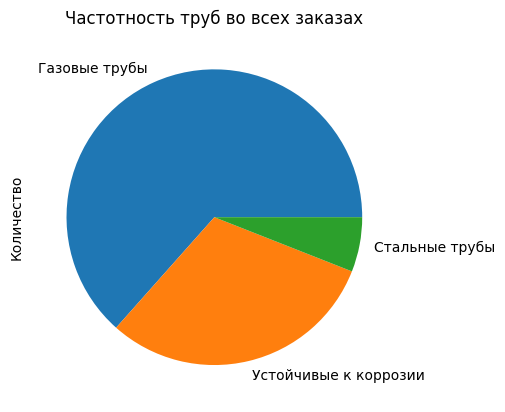

In [ ]:
data['Категория'].value_counts().plot(kind='pie',
                                      title='Частотность труб во всех заказах',
                                      ylabel='Количество');

In [ ]:
data.to_csv('/content/drive/MyDrive/Все оставшееся/Axenix/ОДПП с временными метками.csv', index=False)

In [ ]:
data.head()

,Номер заказа,Номер трубы,Категория,Время принятия на Электросварочный стан_plan,Время принятия на Электросварочный стан_fact,Время принятия в Буфер_plan,Время принятия в Буфер_fact,Длительность перехода из Электросварочный стан в Буфер_plan,Длительность перехода из Электросравочный стан в Буфер_fact,Время принятия на Кромкообрабатывающие станки_plan,...,Длительность перехода из Термообработка в Буфер.2_fact,Время принятия на Испытания_plan,Время принятия на Испытания_fact,Длительность перехода из Буфер.2 на Испытания_plan,Длительность перехода из Буфер.2 на Испытания_fact,Время принятия на Склад готовой продукции_plan,Время принятия на Склад готовой продукции_fact,Длительность перехода из Испытания на Склад готовой продукции_plan,Длительность перехода из Испытания на Склад готовой продукции_fact,Время принятия на Термообработку_plan
0,135,15012396,Стальные трубы,2024-03-01 09:00:10,2024-03-01 09:00:00,2024-03-01 17:50:00,2024-03-01 17:50:00,0 days 08:49:50,0 days 08:50:00,2024-03-01 17:56:20,...,0 days 02:00:00,2024-03-01 22:41:10,2024-03-01 22:41:00,0 days 00:07:00,0 days 00:07:00,2024-03-02 00:52:40,2024-03-02 00:52:00,0 days 02:11:30,0 days 02:11:00,2024-03-01 20:34:30
1,135,15012403,Стальные трубы,2024-03-01 09:01:20,2024-03-01 09:01:00,2024-03-01 17:51:20,2024-03-01 17:51:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:57:00,...,0 days 02:00:00,2024-03-01 22:42:00,2024-03-01 22:42:00,0 days 00:06:30,0 days 00:07:00,2024-03-02 00:53:30,2024-03-02 00:53:00,0 days 02:11:30,0 days 02:11:00,2024-03-01 20:35:50
2,135,15012410,Стальные трубы,2024-03-01 09:02:30,2024-03-01 09:02:00,2024-03-01 17:52:30,2024-03-01 17:52:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:57:40,...,0 days 01:59:00,2024-03-01 22:42:50,2024-03-01 22:42:00,0 days 00:06:00,0 days 00:06:00,2024-03-02 00:54:20,2024-03-02 00:54:00,0 days 02:11:30,0 days 02:12:00,2024-03-01 20:37:10
3,135,15012417,Стальные трубы,2024-03-01 09:03:40,2024-03-01 09:03:00,2024-03-01 17:53:40,2024-03-01 17:53:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:58:20,...,0 days 02:00:00,2024-03-01 22:43:40,2024-03-01 22:43:00,0 days 00:05:30,0 days 00:05:00,2024-03-02 00:55:00,2024-03-02 00:55:00,0 days 02:11:20,0 days 02:12:00,2024-03-01 20:38:30
4,135,15012424,Стальные трубы,2024-03-01 09:04:50,2024-03-01 09:04:00,2024-03-01 17:54:50,2024-03-01 17:54:00,0 days 08:50:00,0 days 08:50:00,2024-03-01 17:59:00,...,14 days 02:00:00,2024-03-01 22:44:30,2024-03-01 22:44:00,-14 days +00:04:50,-14 days +00:05:00,2024-03-02 00:56:00,2024-03-02 00:56:00,0 days 02:11:30,0 days 02:12:00,2024-03-01 20:39:50


Сумма времени для прохода трубы от начала производства до доставки по изначальным данным

In [ ]:
columns_for_mean = [col for col in data.columns if col.startswith('Длительность перехода') and col.endswith('plan')]
print(len(columns_for_mean))

7


In [ ]:
col_f_mean = data.groupby('Категория')[columns_for_mean].agg(['mean'])

In [ ]:
col_f_mean['Длительность перехода'] = col_f_mean.sum(axis=1)
col_f_mean.head()

,Длительность перехода из Электросварочный стан в Буфер_plan,Длительность перехода из Буфера на Кромкообрабатывающие станки_plan,Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan,Длительность перехода из Буфер.1 на Термообработку_plan,Длительность перехода из Термообработка в Буфер.2_plan,Длительность перехода из Буфер.2 на Испытания_plan,Длительность перехода из Испытания на Склад готовой продукции_plan,Длительность перехода
,mean,mean,mean,mean,mean,mean,mean,
Категория,,,,,,,,
Газовые трубы,0 days 07:19:41.233225091,0 days 00:04:25.419072895,0 days 01:33:23.371289141,0 days 00:25:41.482309780,0 days 02:04:16.456892944,0 days 00:04:53.627694184,0 days 00:59:56.416226209,0 days 12:32:18.006710244
Стальные трубы,0 days 07:13:28.660907127,0 days 00:02:54.403887688,0 days 01:30:42.937365010,0 days 00:21:30.755939524,0 days 02:24:07.721382289,-1 days +23:41:53.388768899,0 days 00:58:29.460043196,0 days 12:13:07.328293733
Устойчивые к коррозии,0 days 07:12:00.000000421,0 days 00:02:52.800000,0 days 01:30:00,0 days 00:21:36,0 days 02:02:24,0 days 00:02:52.800000,0 days 00:57:36,0 days 12:09:21.600000421


In [ ]:
col_f_mean.to_csv('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/Длительность перехода.csv', index=False)
col_f_mean.to_excel('/content/drive/MyDrive/Все оставшееся/Axenix/Обработка данных с временем/Длительность перехода.xlsx')

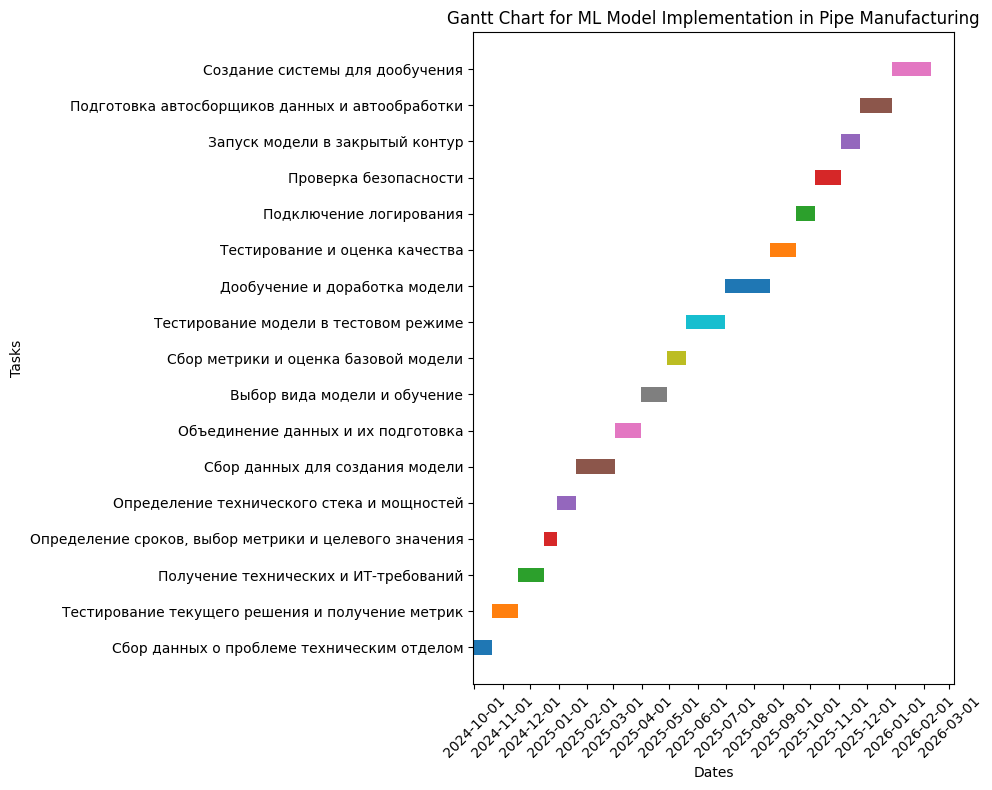

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define tasks and durations
tasks = [
    "Сбор данных о проблеме техническим отделом",
    "Тестирование текущего решения и получение метрик",
    "Получение технических и ИТ-требований",
    "Определение сроков, выбор метрики и целевого значения",
    "Определение технического стека и мощностей",
    "Сбор данных для создания модели",
    "Объединение данных и их подготовка",
    "Выбор вида модели и обучение",
    "Сбор метрики и оценка базовой модели",
    "Тестирование модели в тестовом режиме",
    "Дообучение и доработка модели",
    "Тестирование и оценка качества",
    "Подключение логирования",
    "Проверка безопасности",
    "Запуск модели в закрытый контур",
    "Подготовка автосборщиков данных и автообработки",
    "Создание системы для дообучения"
]

# Define durations in weeks
durations = [3, 4, 4, 2, 3, 6, 4, 4, 3, 6, 7, 4, 3, 4, 3, 5, 6]

# Define start dates
start_date = datetime.today()
task_start_dates = [start_date]
for duration in durations[:-1]:
    next_start = task_start_dates[-1] + timedelta(weeks=duration)
    task_start_dates.append(next_start)

# Calculate end dates
task_end_dates = [start + timedelta(weeks=duration) for start, duration in zip(task_start_dates, durations)]

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Task": tasks,
    "Start": task_start_dates,
    "End": task_end_dates
})

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 8))

# Create the bars
for i, (task, start, end) in enumerate(zip(df["Task"], df["Start"], df["End"])):
    ax.barh(task, (end - start).days, left=start, height=0.4)

# Format x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Labels and title
ax.set_xlabel('Dates')
ax.set_ylabel('Tasks')
ax.set_title('Gantt Chart for ML Model Implementation in Pipe Manufacturing')

plt.tight_layout()
plt.show()

In [22]:
data['Время принятия на Электросварочный стан_plan'].max()

Timestamp('2024-03-16 23:50:05.195000')

Данные для рассчета метрики MAPE по данным за 1, 3 и 7 дней - смотрим Plan, Fact. Для данных даты смотрим столбец **Время принятия на Электросварочный стан_plan**

In [36]:
one_day = pd.to_datetime('2024-03-01').date()
data1 = data[data['Время принятия на Электросварочный стан_plan'].dt.date == one_day]

In [42]:
begin_day3 = pd.to_datetime('2024-03-01').date()
end_day3 = pd.to_datetime('2024-03-03').date()

mask1 = data['Время принятия на Электросварочный стан_plan'].dt.date >= begin_day3
mask2 = data['Время принятия на Электросварочный стан_plan'].dt.date <= end_day3

data3 = data[(mask1) &
             (mask2)]

In [51]:
begin_day7 = pd.to_datetime('2024-03-01').date()
end_day7= pd.to_datetime('2024-03-07').date()

mask3 = data['Время принятия на Электросварочный стан_plan'].dt.date >= begin_day7
mask4 = data['Время принятия на Электросварочный стан_plan'].dt.date <= end_day7

data7 = data[(mask3) &
             (mask4)]

In [57]:
columns = [col for col in data.columns if col.startswith('Длительность перехода')]
display(columns)
print(len(columns))

['Длительность перехода из Электросварочный стан в Буфер_plan',
 'Длительность перехода из Электросравочный стан в Буфер_fact',
 'Длительность перехода из Буфера на Кромкообрабатывающие станки_plan',
 'Длительность перехода из Буфера на Кромкообрабатывающие станки_fact',
 'Длительность перехода из Кромкообрабатывающие станки в Буфер.1_plan',
 'Длительность перехода из Кромкообрабатывающие станки в Буфер.1_fact',
 'Длительность перехода из Буфер.1 на Термообработку_plan',
 'Длительность перехода из Буфер.1 на Термообработку_fact',
 'Длительность перехода из Термообработка в Буфер.2_plan',
 'Длительность перехода из Термообработка в Буфер.2_fact',
 'Длительность перехода из Буфер.2 на Испытания_plan',
 'Длительность перехода из Буфер.2 на Испытания_fact',
 'Длительность перехода из Испытания на Склад готовой продукции_plan',
 'Длительность перехода из Испытания на Склад готовой продукции_fact']

14


In [70]:
metrics_one = []
for i in range(1, len(columns), 2):
  y_true = (data1[columns[i]].astype('int64') // 10**9).to_list()
  y_pred = (data1[columns[i-1]].astype('int64') // 10**9).to_list()
  metrics_one.append(MAPE(y_true=y_true, y_pred=y_pred))

